### Set up

In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

Mounted at /gdrive
/gdrive


In [ ]:
%cd/gdrive/Shareddrives/MSBA BA 810 Team 6

/gdrive/Shareddrives/MSBA BA 810 Team 6


In [ ]:
%%R
install.packages("googledrive")
library("googledrive")

In [ ]:
# Load R
%reload_ext rpy2.ipython
# %config IPCompleter.greedy=True
# %config InlineBackend.figure_format = 'retina'

In [ ]:
# indicate that you're running R code
%%R

# Install if it's your first time to run [this step takes time]
install.packages("data.table") 

install.packages("ggplot2") 

install.packages(c("ggthemes", "scales",'gridExtra'))

install.packages("dplyr")

#install.packages("pscl")

#install.packages("caret")

#install.packages("InformationValue")

#install.packages("olsrr")

# Load
library(data.table)
#library(tidyverse)
library(ggplot2)
library(gridExtra)
library(ggthemes)
#library(scales)
library(dplyr)
#library(randomForest)
#library(pscl)
#library(caret)
#library(InformationValue)
#library(olsrr)

### Load Dataset

In [ ]:
# indicate that you're running R code
%%R

# fread the data table flu_shot
flu_shot1 <- fread("dataset.csv")
head(flu_shot1)


   respondent_id h1n1_concern h1n1_knowledge behavioral_antiviral_meds
1:             0            1              0                         0
2:             1            3              2                         0
3:             2            1              1                         0
4:             3            1              1                         0
5:             4            2              1                         0
6:             5            3              1                         0
   behavioral_avoidance behavioral_face_mask behavioral_wash_hands
1:                    0                    0                     0
2:                    1                    0                     1
3:                    1                    0                     0
4:                    1                    0                     1
5:                    1                    0                     1
6:                    1                    0                     1
   behavioral_large_gatherings beh

In [ ]:
# indicate that you're running R code
%%R
#remove employment_industry & employment_occupation & geo_region
flu_shot1$employment_industry <- NULL
flu_shot1$employment_occupation <- NULL
flu_shot1$hhs_geo_region <- NULL

head(flu_shot1)
dim(flu_shot1)

[1] 26707    35


In [ ]:
# indicate that you're running R code
%%R
#since there is a lot of missing value in health_insurance column, we use mean of all rows to replace N/A
flu_shot1$health_insurance[is.na(flu_shot1$health_insurance)] <- mean(flu_shot1$health_insurance, na.rm = TRUE)
mean(flu_shot1$health_insurance)

[1] 0.8797201


In [ ]:
# indicate that you're running R code
%%R

head(flu_shot1)
dim(flu_shot1)
#fill the blank space with NA
flu_shot <-flu_shot1
flu_shot[flu_shot == ""] <- NA
flu_shot
# drop the missing value
flu_shot = na.omit(flu_shot)
head(flu_shot)
dim(flu_shot)

[1] 19642    35


In [ ]:
# indicate that you're running R code
%%R
dim(flu_shot)
#now we have a data frame with 22976 rows and 36 columns

[1] 19642    35


### EDA

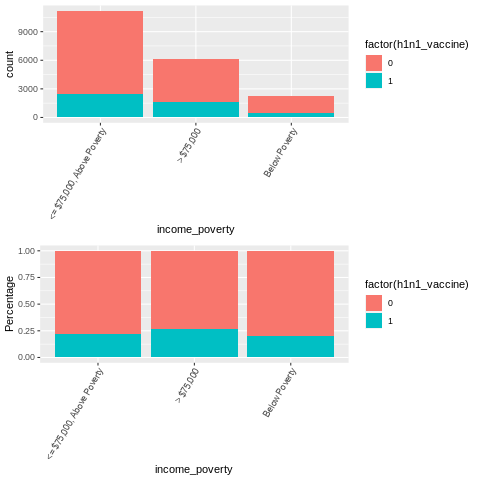

In [ ]:
#Vaccination vs. income_poverty
%%R

x1 = ggplot(flu_shot, aes(income_poverty,fill=factor(h1n1_vaccine))) + geom_bar(position='fill')+
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + ylab("Percentage")

x2 = ggplot(flu_shot, aes(income_poverty,fill=factor(h1n1_vaccine))) + geom_bar()+
  theme(axis.text.x = element_text(angle = 60, hjust=1))

require(gridExtra)
grid.arrange(x2,x1)



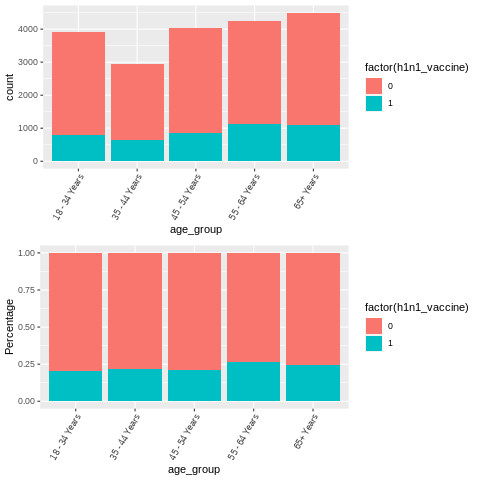

In [ ]:
#h1n1 Vaccination vs. Age
%%R

x1 = ggplot(flu_shot, aes(age_group,fill=factor(h1n1_vaccine))) + geom_bar(position='fill')+
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + ylab("Percentage")

x2 = ggplot(flu_shot, aes(age_group,fill=factor(h1n1_vaccine))) + geom_bar()+
  theme(axis.text.x = element_text(angle = 60, hjust=1))

require(gridExtra)
grid.arrange(x2,x1)


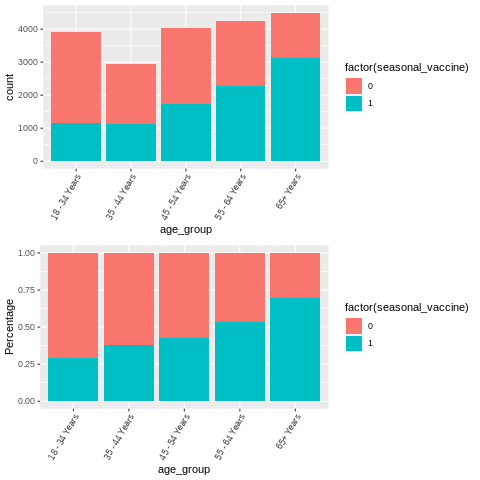

In [ ]:
#Seasonal Vaccination vs. Age
%%R

x1 = ggplot(flu_shot, aes(age_group,fill=factor(seasonal_vaccine))) + geom_bar(position='fill')+
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + ylab("Percentage")

x2 = ggplot(flu_shot, aes(age_group,fill=factor(seasonal_vaccine))) + geom_bar()+
  theme(axis.text.x = element_text(angle = 60, hjust=1))

require(gridExtra)
grid.arrange(x2,x1)

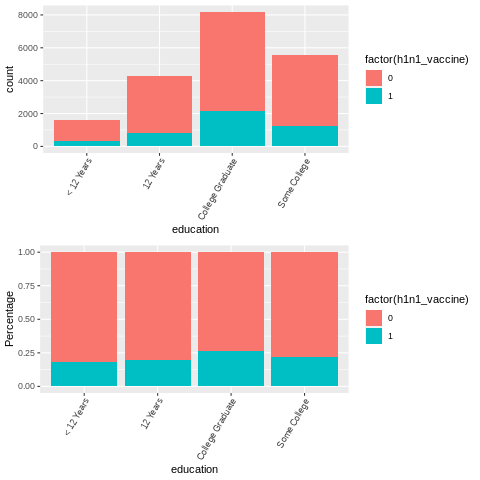

In [ ]:
#H1N1 Vaccination vs. Edu
%%R

x1 = ggplot(flu_shot, aes(education,fill=factor(h1n1_vaccine))) + geom_bar(position='fill')+
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + ylab("Percentage")

x2 = ggplot(flu_shot, aes(education,fill=factor(h1n1_vaccine))) + geom_bar()+
  theme(axis.text.x = element_text(angle = 60, hjust=1))

require(gridExtra)
grid.arrange(x2,x1)

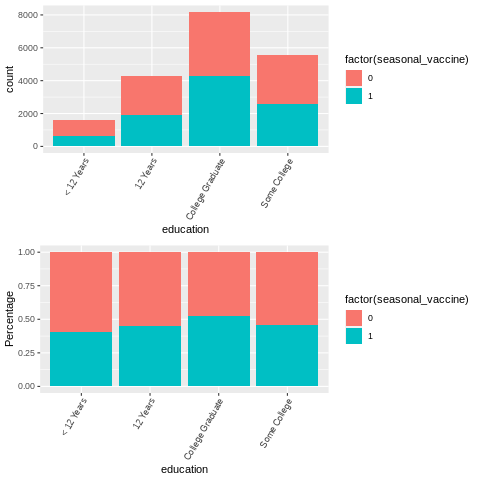

In [ ]:
#Seasonal Vaccination vs. Edu
%%R

x1 = ggplot(flu_shot, aes(education,fill=factor(seasonal_vaccine))) + geom_bar(position='fill')+
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + ylab("Percentage")

x2 = ggplot(flu_shot, aes(education,fill=factor(seasonal_vaccine))) + geom_bar()+
  theme(axis.text.x = element_text(angle = 60, hjust=1))

require(gridExtra)
grid.arrange(x2,x1)

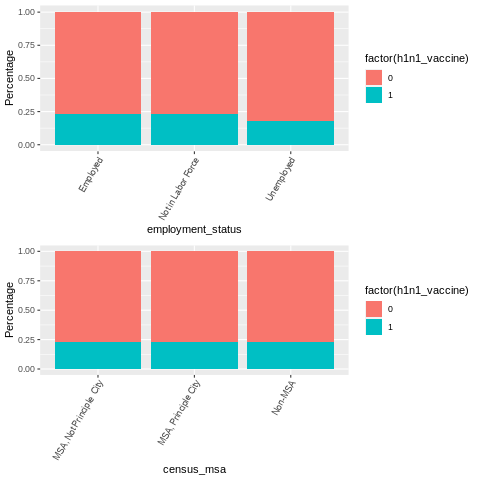

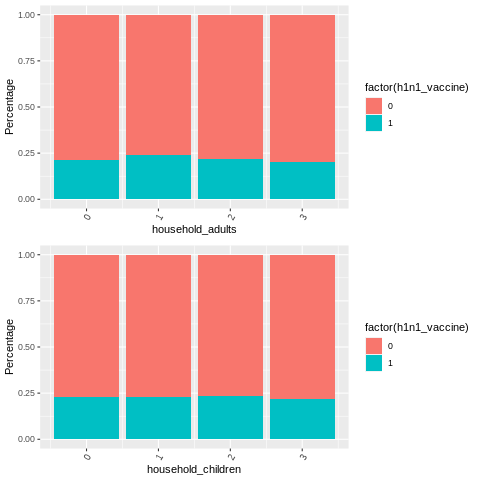

In [ ]:
# indicate that you're running R code
%%R

#employment_status 

flu_shot$employment_status[flu_shot$employment_status == ""] <- NA

x1 = ggplot(flu_shot, aes(employment_status,fill=factor(h1n1_vaccine))) + geom_bar(position ="fill")+
  theme(axis.text.x = element_text(angle = 60, hjust=1))+ ylab("Percentage")


#census_msa
# unique(flu_shot[census_msa])
x3 = ggplot(flu_shot, aes(census_msa,fill=factor(h1n1_vaccine))) + geom_bar(position ="fill")+
  theme(axis.text.x = element_text(angle = 60, hjust=1))+ ylab("Percentage")


# # #household_adults
# # unique(flu_shot[c('household_adults')])
x5 = ggplot(flu_shot, aes(household_adults,fill=factor(h1n1_vaccine))) + geom_bar(position ="fill")+
  theme(axis.text.x = element_text(angle = 60, hjust=1))+ ylab("Percentage")


# # #household_children
# # unique(flu_shot[c('household_children')])
x7 = ggplot(flu_shot, aes(household_children,fill=factor(h1n1_vaccine))) + geom_bar(position ="fill")+
  theme(axis.text.x = element_text(angle = 60, hjust=1))+ ylab("Percentage")


# require(gridExtra)
grid.arrange(x1,x3)
grid.arrange(x5,x7)

#### H1N1 vaccination vs. Concern and Knowledge

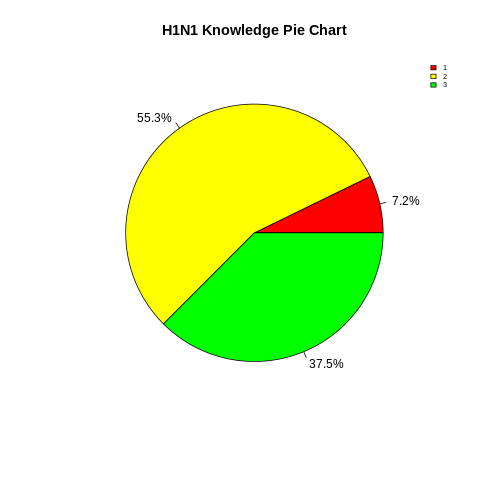

In [ ]:
# Pie Chart of Overall H1N1 Knowledge
%%R
library(dplyr)
k <- flu_shot %>% group_by(h1n1_knowledge) %>% count(Frequency = h1n1_knowledge)
k$label = paste0(round(k$n/sum(k$n)*100 ,1), "%")

rownames(k) <- c("No knowledge","A little knowledge","A lot of knowledge")
k$Frequency <- k$n
k$n <- NULL
k$h1n1_knowledge <- c("No knowledge","A little knowledge","A lot of knowledge")

colors <-  c("red", "yellow", "green")
pie(k$Frequency,labels=k$label,col=colors,main="H1N1 Knowledge Pie Chart") 
legend('topright', rownames(k), fill=colors, bty='n',cex=0.6)

In [ ]:
# Pie Chart of Overall H1N1 Knowledge
%%R
library(dplyr)
k <- flu_shot %>% group_by(h1n1_knowledge) %>% count(Frequency = h1n1_knowledge)
k$label = paste0(round(k$n/sum(k$n)*100 ,1), "%")

rownames(k) <- c("No knowledge","A little knowledge","A lot of knowledge")
k$Frequency <- k$n
k$n <- NULL
k$h1n1_knowledge <- c("No knowledge","A little knowledge","A lot of knowledge")

colors <-  c("red", "yellow", "green")
pie(k$Frequency,labels=k$label,col=colors,main="H1N1 Knowledge Pie Chart") 
legend('topright', rownames(k), fill=colors, bty='n',cex=1)

In [ ]:
# Pie Chart of Overall H1N1 Concern
%%R
library(dplyr)
c <- flu_shot %>% group_by(h1n1_concern) %>% count(Frequency = h1n1_concern)
c$label = paste0(round(c$n/sum(c$n)*100 ,1), "%")

rownames(c) <- c("Not at all concerned"," Not very concerned", "Somewhat concerned","Very concerned")

c$Frequency <- c$n
c$n <- NULL
c$h1n1_concern <- c("Not at all concerned"," Not very concerned", "Somewhat concerned","Very concerned")
c
colors <- c("red", "yellow", "green", "blue")

pie(c$Frequency,labels=c$label,col=colors,main="H1N1 Concern Pie Chart") 
legend('topright', rownames(c), fill=colors, bty='n',cex=0.5)

R[write to console]: Error in group_by(., h1n1_concern) : object 'flu_shot' not found




Error in group_by(., h1n1_concern) : object 'flu_shot' not found


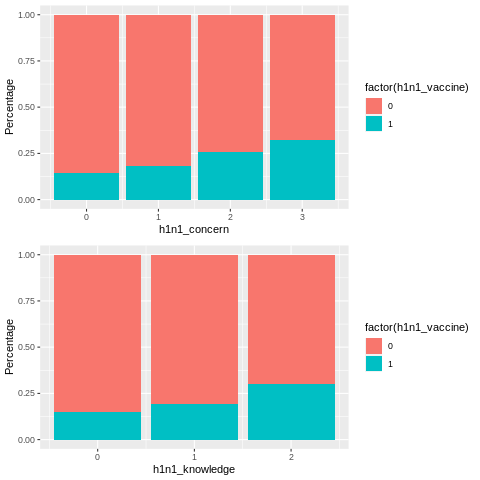

In [ ]:
%%R  
#h1n1_concern
#0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned
concern <- flu_shot[, .( p_not_at_all_concerned = sum(h1n1_concern==0)/ .N, p_not_very_concerned = sum(h1n1_concern==1)/.N, p_somewhat_concerned = sum(h1n1_concern==2)/.N,p_very_concerned = sum(h1n1_concern==3)/.N)]

labs <- c("Not at all concerned","Not very concerned","Somewhat concerned","Very concerned")
x1 = ggplot(flu_shot, aes(h1n1_concern,..count..)) + geom_bar(aes(fill=factor(h1n1_vaccine)),position="fill")+ylab("Percentage")

#h1n1_knowledge
#0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge
knowledge <- flu_shot[, .( p_noknowledge = sum(h1n1_knowledge==0)/ .N, p_a_little_knowledge = sum(h1n1_knowledge==1)/.N, p_a_lot_knowledge = sum(h1n1_knowledge==2)/.N)]

x2 = ggplot(flu_shot, aes(h1n1_knowledge,..count..)) + geom_bar(aes(fill=factor(h1n1_vaccine)),position="fill")+ylab("Percentage")

grid.arrange(x1,x2)

#### H1N1 Vaccine vs. Health Insurance

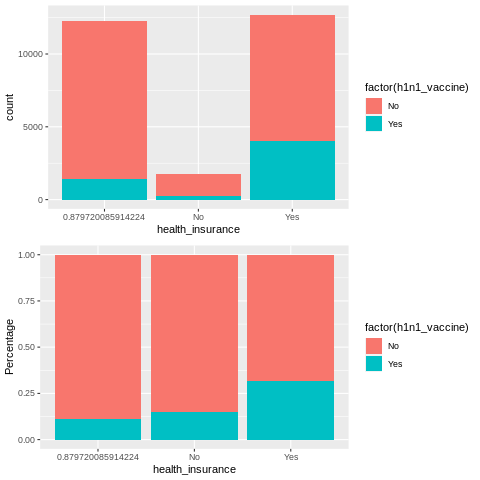

In [ ]:
%%R
flu_shot <-flu_shot1
flu_shot$health_insurance[flu_shot$health_insurance == "1"] <- "Yes"
flu_shot$health_insurance[flu_shot$health_insurance == "0"] <- "No"
flu_shot$h1n1_vaccine[flu_shot$h1n1_vaccine == "1"] <- "Yes"
flu_shot$h1n1_vaccine[flu_shot$h1n1_vaccine == "0"] <- "No"

x1 = ggplot(flu_shot, aes(health_insurance,fill=factor(h1n1_vaccine))) + geom_bar()

x2 = ggplot(flu_shot, aes(health_insurance,fill=factor(h1n1_vaccine))) + geom_bar(position = "fill") +ylab("Percentage")
grid.arrange(x1,x2)

#### H1N1 Opinion on Effectiveness, Risk and Worries 

In [ ]:
%%R
#drop other columns that has N/A values since the quantity of them is small
good <- complete.cases(flu_shot)
flu_shot_test <- flu_shot[good,]
head(flu_shot_test)
dim(flu_shot_test)

[1] 19642    35


In [ ]:
%%R 
head(flu_shot_test$opinion_h1n1_vacc_effective)

[1] 3 5 3 3 5 4


In [ ]:
%%R
flu_shot_test[,. 
          (p_h1n1_effective = mean(opinion_h1n1_vacc_effective), 
           p_h1n1_risk = mean(opinion_h1n1_risk), 
           p_h1n1_sick = mean(opinion_h1n1_sick_from_vacc)
)]

   p_h1n1_effective p_h1n1_risk p_h1n1_sick
1:         3.922258    2.359892    2.347622


In [ ]:
%%R

table_h1n1 <- flu_shot_test[, .(
average_h1n1_effective = sum(opinion_h1n1_vacc_effective) / .N, average_h1n1_risk = sum(opinion_h1n1_risk) / .N, average_h1n1_sick = sum(opinion_h1n1_sick_from_vacc) / .N
)]
table_h1n1 <- melt.data.table( table_h1n1,
measure.vars = colnames(table_h1n1), variable.name = "h1n1",
  value.name = "score_level")
table_h1n1

                     h1n1 score_level
1: average_h1n1_effective    3.922258
2:      average_h1n1_risk    2.359892
3:      average_h1n1_sick    2.347622


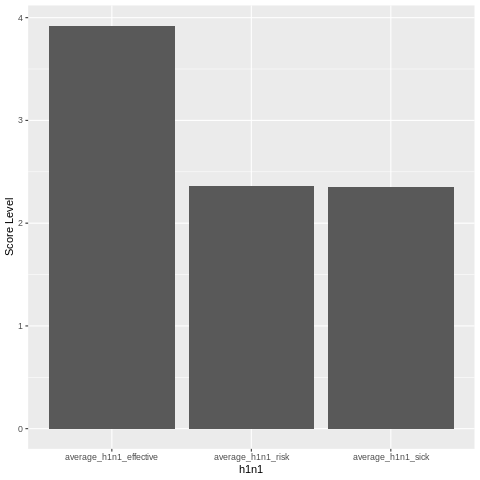

In [ ]:
%%R
ggplot(table_h1n1, aes(h1n1, score_level)) + geom_bar(stat="identity") +
scale_x_discrete("h1n1") +
scale_y_continuous("Score Level") 

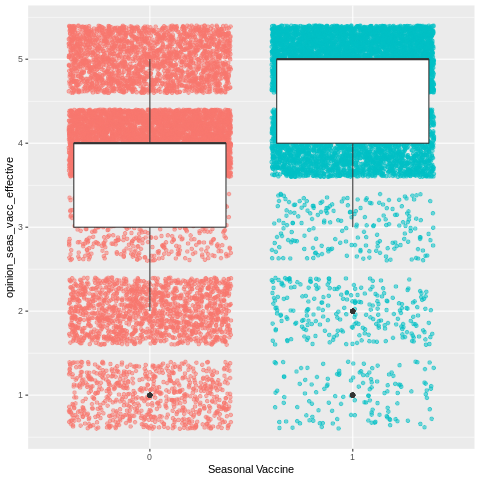

In [ ]:
###############opinions description analysis#############
%%R
library(data.table)
flu_shot <- data.table(flu_shot)

h1n1 <- flu_shot[h1n1_vaccine == 1]
seas <- flu_shot[seasonal_vaccine == 1]
opinions <- colnames(flu_shot)[17:22]
h1n1_flu_opinions <- h1n1[,..opinions]

#opinion_h1n1_vacc_effective
o1 <- ggplot(flu_shot, mapping = aes(x = factor(h1n1_vaccine), y = opinion_h1n1_vacc_effective)) + 
  geom_jitter(aes(color = factor(h1n1_vaccine), alpha = 0.7))+
  geom_boxplot()+
  theme(legend.position = "none")
o1 <- o1 +scale_x_discrete(name = "H1N1 Vaccine")

o2 <- ggplot(flu_shot, mapping =aes(x = factor(seasonal_vaccine), y = opinion_seas_vacc_effective)) + 
  geom_jitter(aes(color = factor(seasonal_vaccine), alpha = 0.7))+
  geom_boxplot()+
  theme(legend.position = "none")
o2 <- o2 +scale_x_discrete(name = "Seasonal Vaccine")

#opinion_h1n1_vacc_effective
o3 <- ggplot(flu_shot, mapping = aes(x = factor(h1n1_vaccine), y = opinion_h1n1_risk)) + 
  geom_jitter(aes(color = factor(h1n1_vaccine), alpha = 0.7))+
  geom_boxplot()+
  theme(legend.position = "none")
o3 <- o3 +scale_x_discrete(name = "H1N1 Vaccine")

o4 <- ggplot(flu_shot, mapping =aes(x = factor(seasonal_vaccine), y = opinion_seas_risk)) + 
  geom_jitter(aes(color = factor(seasonal_vaccine), alpha = 0.7))+
  geom_boxplot()+
  theme(legend.position = "none")
o4 <- o4 +scale_x_discrete(name = "Seasonal Vaccine")

#pinion_h1n1_sick_from_vacc
o5 <- ggplot(flu_shot, mapping = aes(x = factor(h1n1_vaccine), y = opinion_h1n1_sick_from_vacc)) + 
  geom_jitter(aes(color = factor(h1n1_vaccine), alpha = 0.7))+
  geom_boxplot()+
  theme(legend.position = "none")
o5 <- o5 +scale_x_discrete(name = "H1N1 Vaccine")

o6 <- ggplot(flu_shot, mapping =aes(x = factor(seasonal_vaccine), y = opinion_seas_sick_from_vacc)) + 
  geom_jitter(aes(color = factor(seasonal_vaccine), alpha = 0.7))+
  geom_boxplot()+
  theme(legend.position = "none")
o6 <- o6 +scale_x_discrete(name = "Seasonal Vaccine")

require(gridExtra)
#grid.arrange(o1,o2,o5,ncol=3)
#grid.arrange(o2,o4,o6,ncol =3)
#grid.arrange(o5,o6, ncol = 2)
o2

#### H1N1 knowledge vs. behaviorals Analysis.


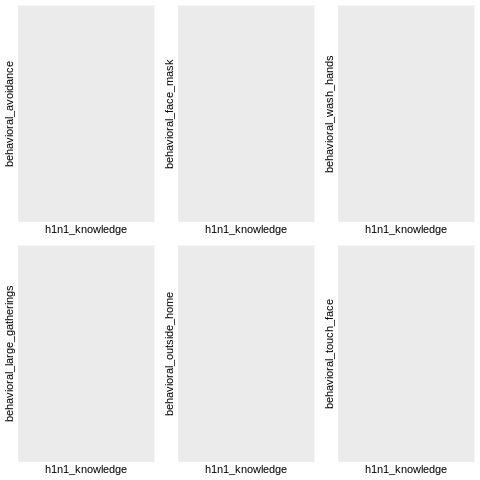

In [ ]:
# h1n1_vaccine_yes
%%R
flu_shot <- data.table(flu_shot)
h1n1 <- flu_shot[h1n1_vaccine == 1]
subset1 <- select(h1n1, h1n1_knowledge:behavioral_touch_face)

#knowledge vs. behavioral_avoidance
p1 <- ggplot(data =subset1, aes(x=h1n1_knowledge,y=behavioral_avoidance,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_face_mask
p2 <- ggplot(data =subset1, aes(x=h1n1_knowledge,y=behavioral_face_mask,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_wash_hands
p3 <- ggplot(data =subset1, aes(x=h1n1_knowledge,y=behavioral_wash_hands,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_large_gatherings
p4 <- ggplot(data =subset1, aes(x=h1n1_knowledge,y=behavioral_large_gatherings,fill=h1n1_knowledge))+  stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_outside_home
p5 <- ggplot(data =subset1, aes(x=h1n1_knowledge,y=behavioral_outside_home,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_touch_face
p6 <- ggplot(data =subset1, aes(x=h1n1_knowledge,y=behavioral_touch_face,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#show 6 plots
require(gridExtra)
grid.arrange(p1,p2,p3,p4,p5,p6,nrow=2)

> Among people who took H1N1 vaccine, the greater the h1n1 knowledge people have, in general, they tend to focus a lot on personal health care：(aviodance close contact with others with flu-like symptoms; face face, masks, wash hands more frequently, and less touch face); yet, time at large gatherings nor time outside house were not reduced a lot. 

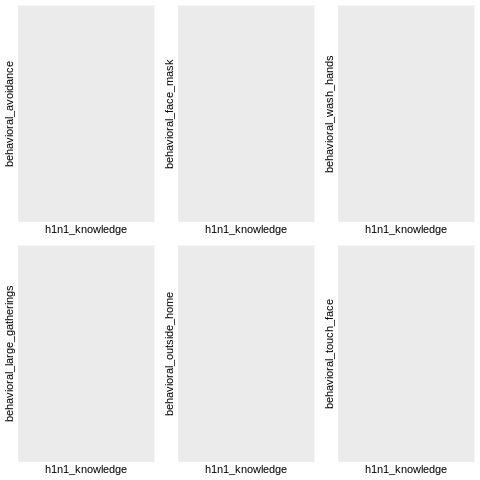

In [ ]:
# h1n1_vaccine_no
%%R
flu_shot <- data.table(flu_shot)
h1n1 <- flu_shot[h1n1_vaccine == 0]
subset0 <- select(h1n1, h1n1_knowledge:behavioral_touch_face)

#knowledge vs. behavioral_avoidance
p1 <- ggplot(data =subset0, aes(x=h1n1_knowledge,y=behavioral_avoidance,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_face_mask
p2 <- ggplot(data =subset0, aes(x=h1n1_knowledge,y=behavioral_face_mask,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_wash_hands
p3 <- ggplot(data =subset0, aes(x=h1n1_knowledge,y=behavioral_wash_hands,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_large_gatherings
p4 <- ggplot(data =subset0, aes(x=h1n1_knowledge,y=behavioral_large_gatherings,fill=h1n1_knowledge))+  stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_outside_home
p5 <- ggplot(data =subset0, aes(x=h1n1_knowledge,y=behavioral_outside_home,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_touch_face
p6 <- ggplot(data =subset0, aes(x=h1n1_knowledge,y=behavioral_touch_face,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#show 6 plots
require(gridExtra)
grid.arrange(p1,p2,p3,p4,p5,p6,nrow=2)

> Among people who did not take H1N1 vaccine, the greater the h1n1 knowledge people have, in general, they tend to focus a lot on personal health care：(aviodance close contact with others with flu-like symptoms; face face, masks, wash hands more frequently, and less touch face); yet, time at large gatherings nor time outside house were not reduced a lot. 
> There is no big difference on people's h1n1 related behaviors based upon their h1n1 knowledge between the group who took the h1n1 vaccine or not. 

In [ ]:
# H1N1 knowledge vs. behaviorals (overall)
%%R 
subset <- select(flu_shot, h1n1_knowledge:behavioral_touch_face)
#knowledge vs. behavioral_avoidance
p1 <- ggplot(data =subset, aes(x=h1n1_knowledge,y=behavioral_avoidance,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_face_mask
p2 <- ggplot(data =subset, aes(x=h1n1_knowledge,y=behavioral_face_mask,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_wash_hands
p3 <- ggplot(data =subset, aes(x=h1n1_knowledge,y=behavioral_wash_hands,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_large_gatherings
p4 <- ggplot(data =subset, aes(x=h1n1_knowledge,y=behavioral_large_gatherings,fill=h1n1_knowledge))+  stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_outside_home
p5 <- ggplot(data =subset, aes(x=h1n1_knowledge,y=behavioral_outside_home,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#knowledge vs. behavioral_touch_face
p6 <- ggplot(data =subset, aes(x=h1n1_knowledge,y=behavioral_touch_face,fill=h1n1_knowledge))+ stat_summary(fun = mean, geom="bar")+ theme(legend.position="none")

#show 6 plots
require(gridExtra)
grid.arrange(p1,p2,p3,p4,p5,p6,nrow=2)

R[write to console]: Error in select(flu_shot, h1n1_knowledge:behavioral_touch_face) : 
  object 'flu_shot' not found




Error in select(flu_shot, h1n1_knowledge:behavioral_touch_face) : 
  object 'flu_shot' not found


#### education vs h1n1 vaccine 

In [ ]:
%%R
# flu_shot$employment_industry <- NULL
# flu_shot$employment_occupation <- NULL
# flu_shot$health_insurance[is.na(flu_shot$health_insurance)] <- mean(flu_shot$health_insurance, na.rm = TRUE)
# mean(flu_shot$health_insurance)
# #fill the blank space with NA
# flu_shot_nona <-copy(flu_shot)
# flu_shot_nona[flu_shot_nona == ""] <- NA
# flu_shot_nona
# # drop the missing value
# flu_shot_nona = na.omit(flu_shot_nona)

NULL


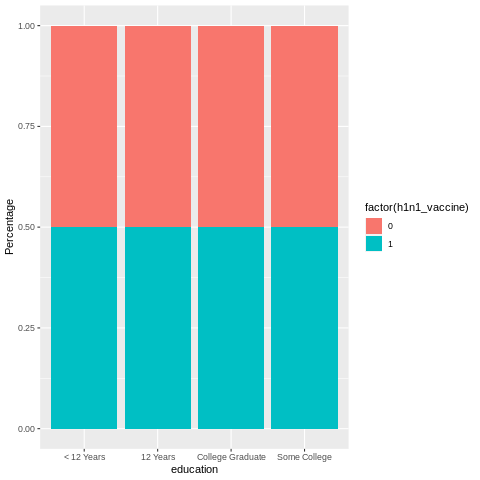

In [ ]:
%%R
edu_h1n1 <- subset(flu_shot, select=c("education", "h1n1_vaccine"))
edu_h1n1<- edu_h1n1%>%group_by(education)%>%count(h1n1_vaccine)
# people with higher educational level tend to be more willing to take h1n1 vaccine shot,
# but in generally the percent of not tabking shot for each level is much higher than taking.
ggplot(data=edu_h1n1, aes(x=education ,fill=factor(h1n1_vaccine)))+ geom_bar(position='fill')+ylab("Percentage")

#x2 = ggplot(flu_shot, aes(health_insurance,fill=factor(h1n1_vaccine))) + geom_bar(position = "fill") +ylab("Percentage")


In [ ]:
%%R
install.packages("d")
library()

edu_know <- subset(flu_shot, select=c("education", "h1n1_knowledge"))
edu_know <- edu_know%>%group_by(education)%>%count(h1n1_knowledge)
ggplot(data=edu_know, aes(x=education,y=percent, fill=factor(h1n1_knowledge)))+
        geom_bar(stat="identity", position="dodge")+
        scale_fill_discrete(name="h1n1 knowledge level", labels=c("No knowledge", "A little knowledge", "A lot of knowledge"))+
        xlab("education level")+ylab("percent")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Error in FUN(X[[i]], ...) : object 'percent' not found

R[write to console]: In addition: 
R[write to console]: There were 13 warnings (use warnings() to see them)
R[write to console]: 



RRuntimeError: ignored

#### Comparison between h1n1 and seasonal vaccine given that vaccine is taken

In [ ]:
%%R
flu_shot <- data.table(flu_shot)

##subset
h1n1 <- flu_shot[h1n1_vaccine == 1]
seas <- flu_shot[seasonal_vaccine == 1]

h1n1[, c("seasonal_vaccine"):=NULL]
seas[, c("h1n1_vaccine"):=NULL]

binary <- colnames(flu_shot)[4:16]
opinions <- colnames(flu_shot)[17:22]

##binary description analysis
h1n1_bi <- h1n1[, ..binary]
seas_bi <- seas[, ..binary]

h1n1_bi_mean <- colMeans(h1n1_bi, na.rm = TRUE)
seas_bi_mean <- colMeans(seas_bi, na.rm = TRUE)

bi_means <- data.table(binary,h1n1_bi_mean,seas_bi_mean)
bi_means

R[write to console]: Error in colMeans(h1n1_bi, na.rm = TRUE) : 'x' must be numeric




Error in colMeans(h1n1_bi, na.rm = TRUE) : 'x' must be numeric


In [ ]:
%%R
install.packages("ggalt")

In [ ]:
%%R
library(ggplot2)

library(ggalt)
theme_set(theme_classic())

# health$Area <- factor(health$Area)
# gg <- ggplot(bi_means, aes(x=, xend=1, y=binary, group=binary)) + 
#         geom_dumbbell() + 
#         scale_x_continuous(label=percent) 




gg <- ggplot(bi_means, aes(x=h1n1_bi_mean, xend=seas_bi_mean, y=binary, group=binary)) + 
        geom_dumbbell(color="#a3c4dc", 
                      size=0.75, 
                      point.color.l="#1B629E") 
plot(gg)

R[write to console]: Error in library(ggalt) : there is no package called ‘ggalt’




Error in library(ggalt) : there is no package called ‘ggalt’


### Split Train Test

In [ ]:
%%R
#formula
f1 <- as.formula(h1n1_vaccine ~ h1n1_concern + h1n1_knowledge + behavioral_antiviral_meds 
                 + behavioral_avoidance + behavioral_face_mask + behavioral_wash_hands
                 + behavioral_large_gatherings + behavioral_touch_face + doctor_recc_h1n1
                 + chronic_med_condition + child_under_6_months + health_worker
                 + health_insurance + opinion_h1n1_vacc_effective + opinion_h1n1_risk
                 + opinion_h1n1_sick_from_vacc + age_group + education + race + sex
                 + income_poverty + marital_status + rent_or_own + employment_status
                 + census_msa + household_adults + household_children)

In [ ]:
%%R
install.packages("data.table")

In [ ]:
%%R
library(data.table)
h1n1_vac <- data.table(flu_shot)

set.seed(100)
training_row_index <- sample(1:nrow(h1n1_vac), 0.7*nrow(h1n1_vac))
training_data <- h1n1_vac[training_row_index, ]
test_data<-h1n1_vac[-training_row_index, ]
x1_train <- model.matrix(f1, training_data)

train_x <- x1_train[,-1]
train_y <- training_data$h1n1_vaccine

test_x <- model.matrix(f1, test_data)[,-1]
test_y <- test_data$h1n1_vaccine

### Random Forest

In [ ]:
%%R
######DDDDDD
#Spliting
flu_shot_train <- sample_frac(flu_shot1,0.7)
sid <- as.numeric(rownames(flu_shot_train))
flu_shot_test <- flu_shot1[-sid,]


R[write to console]: Error in sample_frac(flu_shot1, 0.7) : 
  could not find function "sample_frac"




Error in sample_frac(flu_shot1, 0.7) : 
  could not find function "sample_frac"


In [ ]:
%%R
install.packages("randomForest")
library(randomForest)

From cffi callback <function _processevents at 0x7faab20f4320>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


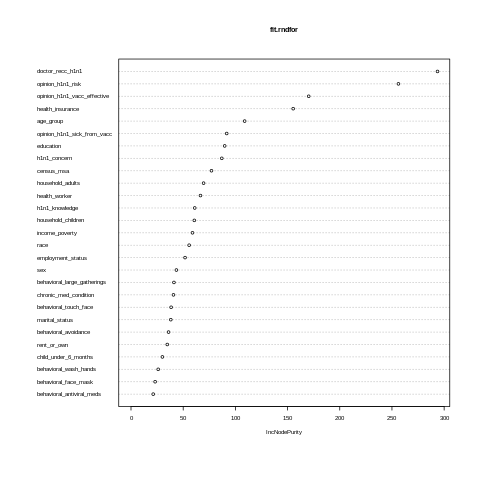

In [ ]:
%%R
# random forest
fit.rndfor <-  randomForest(f1,training_data,ntree=500,do.trace=F)
varImpPlot(fit.rndfor,cex=0.5)

In [ ]:
%%R
yhat.rndfor <- predict(fit.rndfor, training_data)
mse.tree.train <- mean((yhat.rndfor - train_y) ^ 2)
print(mse.tree.train)

[1] 0.03390711


In [ ]:
%%R
yhat.rndfor.test <- predict(fit.rndfor, test_data)
mse.tree.test <- mean((yhat.rndfor.test - test_y) ^ 2)
print(mse.tree.test)

[1] 0.1157937


From cffi callback <function _processevents at 0x7faab20f4320>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


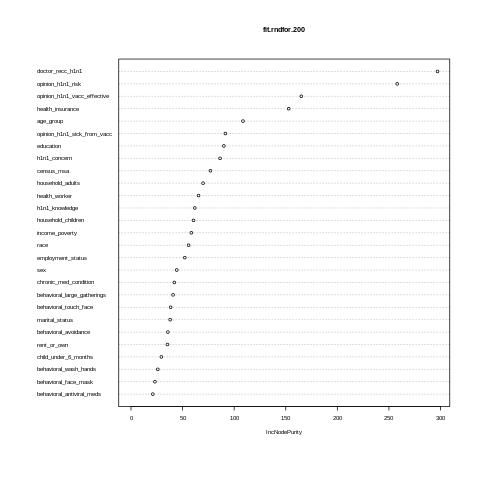

In [ ]:
%%R
# random forest
fit.rndfor.200 <-  randomForest(f1,training_data,ntree=200,do.trace=F)
varImpPlot(fit.rndfor.200,cex=0.5)

In [ ]:
%%R
yhat.rndfor.200 <- predict(fit.rndfor.200, training_data)
mse.tree.train.200 <- mean((yhat.rndfor.200 - train_y) ^ 2)
print(mse.tree.train.200)

UsageError: Cell magic `%%R` not found.


### Logistic Regression

In [ ]:
%%R
#fomula

flu_shot <-flu_shot1
f2 <- as.formula(h1n1_vaccine ~  education + age_group + health_insurance
                 + opinion_h1n1_vacc_effective + opinion_h1n1_risk + doctor_recc_h1n1)
model <- glm(f2, family = "binomial", data = flu_shot_train)

options(scipen=999)
summary(model)

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R
#However, there is no such R2 value for logistic regression. 
#Instead, we can compute a metric known as McFadden’s R2 v, 
#which ranges from 0 to just under 1. 
#Values close to 0 indicate that the model has no predictive power. 
#In practice, values over 0.40 indicate that a model fits the data very well.

pscl::pR2(model)["McFadden"]

fitting null model for pseudo-r2
 McFadden 
0.2532832 


In [ ]:
%%R
#compute importance of each feature
caret::varImp(model)

                               Overall
education< 12 Years          3.8160900
education12 Years            1.9770930
educationCollege Graduate    0.8322480
educationSome College        0.9414131
age_group35 - 44 Years       1.5044307
age_group45 - 54 Years       0.2557124
age_group55 - 64 Years       4.4754608
age_group65+ Years           3.9357428
health_insurance            10.2343459
opinion_h1n1_vacc_effective 23.3651244
opinion_h1n1_risk           28.4909484
doctor_recc_h1n1            36.6851219


In [ ]:
%%R
# predict 
predicted <- predict(model, flu_shot_test, type="response")

optimal <- optimalCutoff(flu_shot_test$h1n1_vaccine, predicted)[1]
optimal

confusionMatrix(flu_shot_test$h1n1_vaccine, predicted)

R[write to console]: Error in optimalCutoff(flu_shot_test$h1n1_vaccine, predicted) : 
  could not find function "optimalCutoff"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in optimalCutoff(flu_shot_test$h1n1_vaccine, predicted) : 
  could not find function "optimalCutoff"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
#calculate total misclassification error rate
misClassError(flu_shot_test$h1n1_vaccine, predicted, threshold=optimal)

R[write to console]: Error in misClassError(flu_shot_test$h1n1_vaccine, predicted, threshold = optimal) : 
  could not find function "misClassError"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in misClassError(flu_shot_test$h1n1_vaccine, predicted, threshold = optimal) : 
  could not find function "misClassError"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
#plot the ROC curve
plotROC(flu_shot_test$h1n1_vaccine, predicted)

R[write to console]: Error in plotROC(flu_shot_test$h1n1_vaccine, predicted) : 
  could not find function "plotROC"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in plotROC(flu_shot_test$h1n1_vaccine, predicted) : 
  could not find function "plotROC"
Calls: <Anonymous> -> <Anonymous> -> withVisible


### Lasso Regression


In [ ]:
%%R
install.packages("glmnet")
library(glmnet)

In [ ]:
%%R
# #perform k-fold cross-validation to find optimal lambda value
# y <- flu_shot_train$h1n1_vaccine

# #define matrix of predictor variables
# x <- data.matrix(flu_shot_train[, c('h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds',
#                               'behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands',
#                               'behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face',
#                               'doctor_recc_h1n1','chronic_med_condition','child_under_6_months','health_worker',
#                               'health_insurance','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
#                               'age_group','education','race','sex','income_poverty','marital_status',
#                               'rent_or_own','employment_status','census_msa','household_adults','household_children')])

cv_model <- cv.glmnet(train_x, train_y, alpha = 1)

#find optimal lambda value that minimizes test MSE
best_lambda <- cv_model$lambda.min
best_lambda


[1] 0.000523486


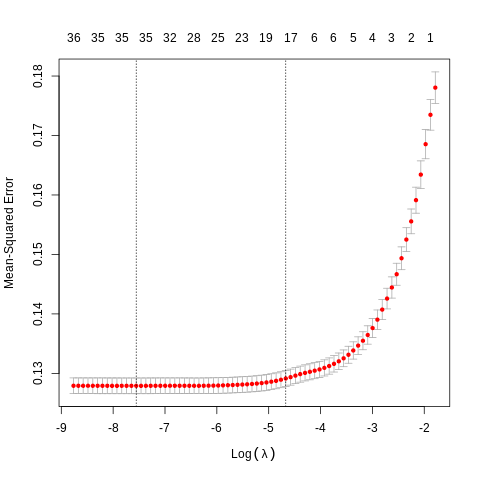

In [ ]:
%%R
#produce plot of test MSE by lambda value
plot(cv_model)

In [ ]:
%%R
#find coefficients of best model
best_model <- glmnet(train_x, train_y, alpha = 1, lambda = best_lambda)
coef(best_model)

38 x 1 sparse Matrix of class "dgCMatrix"
                                               s0
(Intercept)                         -0.4737387875
h1n1_concern                        -0.0170992586
h1n1_knowledge                       0.0221431939
behavioral_antiviral_meds            .           
behavioral_avoidance                -0.0069290656
behavioral_face_mask                 0.0141170587
behavioral_wash_hands                0.0011521867
behavioral_large_gatherings         -0.0254006276
behavioral_touch_face                0.0058605826
doctor_recc_h1n1                     0.2946242598
chronic_med_condition                0.0206216520
child_under_6_months                 0.0433986603
health_worker                        0.1527187070
health_insurance                     0.1063274680
opinion_h1n1_vacc_effective          0.0690094497
opinion_h1n1_risk                    0.0791769448
opinion_h1n1_sick_from_vacc         -0.0058789719
age_group35 - 44 Years               0.0031180733
age_grou

In [ ]:
%%R
# #use fitted best model to make predictions
# y2 <- flu_shot_test$h1n1_vaccine
# x2 <- data.matrix(flu_shot_test[, c('h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds',
#                                    'behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands',
#                                    'behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face',
#                                    'doctor_recc_h1n1','chronic_med_condition','child_under_6_months','health_worker',
#                                    'health_insurance','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
#                                    'age_group','education','race','sex','income_poverty','marital_status',
#                                    'rent_or_own','employment_status','census_msa','household_adults','household_children')])
y_predicted <- predict(best_model, s = best_lambda, newx = test_x)

In [ ]:
%%R
#find SST and SSE
sst <- sum((test_y - mean(test_y))^2)
sse <- sum((y_predicted - test_y)^2)

In [ ]:
%%R
#find R-Squared
rsq <- 1 - sse/sst
rsq

[1] 0.2648741


In [ ]:
%%R
#MSE
mse <- mean((y_predicted - test_y)^2)
mse

[1] 0.1280554


### Ridge

In [ ]:
%%R
fit_ridge <- glmnet(train_x, train_y, alpha = 0)
min_lambda <- min(fit_ridge$lambda)

predict(fit_ridge,
        type = "coefficients",
        s = min_lambda)

38 x 1 sparse Matrix of class "dgCMatrix"
                                                1
(Intercept)                         -0.4713664624
h1n1_concern                        -0.0152637555
h1n1_knowledge                       0.0229525701
behavioral_antiviral_meds            0.0014897118
behavioral_avoidance                -0.0083740298
behavioral_face_mask                 0.0169740318
behavioral_wash_hands                0.0035591032
behavioral_large_gatherings         -0.0255263312
behavioral_touch_face                0.0075608717
doctor_recc_h1n1                     0.2854618933
chronic_med_condition                0.0232286711
child_under_6_months                 0.0449902617
health_worker                        0.1499127220
health_insurance                     0.1054114609
opinion_h1n1_vacc_effective          0.0675991109
opinion_h1n1_risk                    0.0766578059
opinion_h1n1_sick_from_vacc         -0.0054990827
age_group35 - 44 Years               0.0030402189
age_grou

In [ ]:
%%R
##training MSE
train_pred = predict(fit_ridge, s = min_lambda, newx = train_x)
mean((train_pred - train_y)^2)


[1] 0.1272473


In [ ]:
%%R
##Test MSE
test_pred = predict(fit_ridge, s = min_lambda, newx = test_x)
mean((test_pred - test_y)^2)

[1] 0.1279853


### Linear Regression

In [ ]:
# %%R
# # split 70% trainging 30% testing
# h1n1_vac <- copy(flu_shot)
# set.seed(100)
# training_row_index <- sample(1:nrow(h1n1_vac), 0.7*nrow(h1n1_vac))
# training_data<- h1n1_vac[training_row_index, ]
# test_data<-h1n1_vac[-training_row_index, ]

In [ ]:
%%R
## regression with all
model_all <- lm(data = traing_data, h1n1_vaccine ~ factor(h1n1_concern) + factor(h1n1_knowledge) + factor(behavioral_antiviral_meds) 
                 + factor(behavioral_avoidance) + factor(behavioral_face_mask) + factor(behavioral_wash_hands)
                 + factor(behavioral_large_gatherings) + factor(behavioral_touch_face) + factor(doctor_recc_h1n1)
                 + factor(chronic_med_condition) + factor(child_under_6_months) + factor(health_worker)
                 + factor(health_insurance) + factor(opinion_h1n1_vacc_effective) + factor(opinion_h1n1_risk)
                 + factor(opinion_h1n1_sick_from_vacc) + factor(age_group) + factor(education) + factor(race) + factor(sex)
                 + factor(income_poverty) + factor(marital_status) + factor(rent_or_own) + factor(employment_status)
                 + factor(census_msa) + factor(household_adults) + factor(household_children))
mean((model_all$residuals)^2)

[1] 0.178185


In [ ]:
%%R
# testing mse
model_all_test_data <- subset(test_data, select=c("h1n1_vaccine"))
model_all_test_data<- model_all_test_data%>%rename(actual = h1n1_vaccine)
model_all_test_data["predict"] = predict(model_all,test_data)
mean((model_all_test_data$actual - model_all_test_data$predict)^2)

R[write to console]: Error in rename(., actual = h1n1_vaccine) : 
  unused argument (actual = h1n1_vaccine)




Error in rename(., actual = h1n1_vaccine) : 
  unused argument (actual = h1n1_vaccine)


In [ ]:
%%R
# delete non-significant variables
model_select <- lm(data = traing_data, h1n1_vaccine ~ + factor(h1n1_knowledge)
                 + factor(behavioral_large_gatherings) + factor(behavioral_touch_face) + factor(doctor_recc_h1n1)
                 + factor(chronic_med_condition) + factor(child_under_6_months) + factor(health_worker)
                 + factor(health_insurance) + factor(opinion_h1n1_vacc_effective) + factor(opinion_h1n1_risk)
                 + factor(opinion_h1n1_sick_from_vacc) + factor(age_group) + factor(education) + factor(race) + factor(sex)
                 + factor(census_msa))
mean((model_select$residuals)^2)

R[write to console]: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  NA/NaN/Inf in 'y'
Calls: <Anonymous> -> <Anonymous> -> withVisible -> lm -> lm.fit

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In storage.mode(v) <- "double" :
R[write to console]:  NAs introduced by coercion




Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  NA/NaN/Inf in 'y'
Calls: <Anonymous> -> <Anonymous> -> withVisible -> lm -> lm.fit


In [ ]:
%%R
# testing mse
model_select_test_data <- subset(test_data, select=c("h1n1_vaccine"))
model_select_test_data<- model_select_test_data%>%rename(actual = h1n1_vaccine)
model_select_test_data["predict"] = predict(model_select,test_data)
mean((model_select_test_data$actual - model_select_test_data$predict)^2)


R[write to console]: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  NA/NaN/Inf in 'y'
Calls: <Anonymous> -> <Anonymous> -> withVisible -> lm -> lm.fit

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In storage.mode(v) <- "double" :
R[write to console]:  NAs introduced by coercion




Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  NA/NaN/Inf in 'y'
Calls: <Anonymous> -> <Anonymous> -> withVisible -> lm -> lm.fit


In [ ]:
%%R


R[write to console]: Error in predict(model2, test_data) : object 'model2' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> predict




Error in predict(model2, test_data) : object 'model2' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> predict


### Forward and Backward Selection

In [ ]:
# %%R
# # split 70% trainging 30% testing
# h1n1_vac <- copy(flu_shot)
# set.seed(100)
# training_row_index <- sample(1:nrow(h1n1_vac), 0.7*nrow(h1n1_vac))
# train_data<- h1n1_vac[training_row_index, ]
# test_data<-h1n1_vac[-training_row_index, ]

In [ ]:
%%R
# selected columns for building model (drop seasonal_flu-related columns )
model <- lm(f1, data=training_data)

In [ ]:
%%R
#Forward selection using AIC values
#Dropping the seasonal_flu columns
#A drop in AIC values means the improvement of the model; the less AIC the better

FDWfit.aic <- ols_step_forward_aic(model,details=TRUE)

R[write to console]: Error in ols_step_forward_aic(model, details = TRUE) : 
  could not find function "ols_step_forward_aic"




Error in ols_step_forward_aic(model, details = TRUE) : 
  could not find function "ols_step_forward_aic"


> Forward Selection Summary [for training data]
- R-Squared            0.271      
- MSE                  0.127 

In [ ]:
%%R
#Backward Selection
#Backward regression using aic
BWDfit.aic <- ols_step_backward_aic(model,details=TRUE)


> Backward Selection Summary [for 

1.   List item
2.   List item

training data]
- R-Squared            0.271       
- MSE                  0.127 

> By comparing the AIC scores for both forward and backward selecitons, the two approahces return the same AIC values and the same MSE score; thus, it is reasonable to conclude that the two models show similar performance. Yet, the only difference among the two models is that different columns were selected for the two approahces and sequence of column selection varied as well. 


In [ ]:
#Stepwise regression using aic (combine both foreward and backward)
%%R
Bothfit.aic <- ols_step_both_aic(model,details=TRUE)


> Stwpwise Selection Summary [for training data]
- R-Squared            0.286 
- MSE                  0.128 



> Because the three stepwise selection models we built have the same AIC scores, we cannot evaluate which model has the best performanfce on the test dataset. By comparing the MSE score, we can see that stepwise selection has higher MSE score than the forward and the backward.
> Next, we then want to compare the MSE score of stepwise with other regression models, and to decide which ML model we want to apply to predict the h1n1_vaccine probability.

In [ ]:
# MSE score wrote above were MSEtrain
# either use  the MSEtrain score as the MSEtest, or come up with random number as MSEtest